Z:/PY4113/Mach Zedner/Mach Zedner/LvsT10mWfinal.txt


<Figure size 640x480 with 0 Axes>

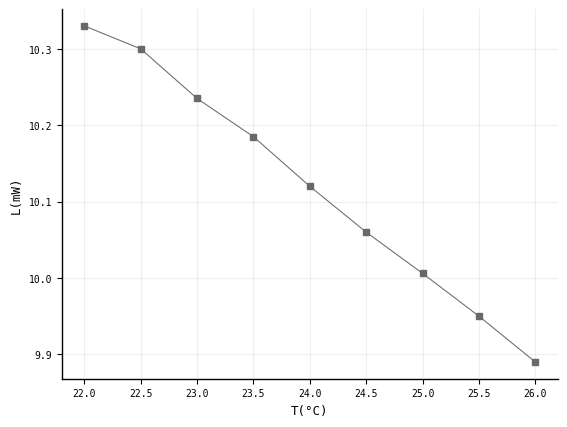

In [18]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt 
import os
from pylab import *
import sys
import tkinter
from tkinter import filedialog

index = 0
peaks = []
data = []
h = 6.62607015e-34 #planck
c = 2.99792458e8 #speed of light
e = 1.60217663e-19 #electron
k = 1.380649e-23 #boltzmann
J_eV = 1/(6.242e18) #Joules / eV
i = 0

#FORMAT:
#   X | Y | Y_MAX | Y_MIN

PLOT_LIMIT = [20, 26]
Y_LIMIT = [] # enforced only for log plots [lower, upper] - leave blank for auto
ERROR_BARS = False


def plot_graph(x, y): #create a single plot
    labels = []
    plt.figure()
    #plt.xlim(PLOT_LIMIT)
    fig, ax = plt.subplots()
    plt.title(f"")
    plt.xlabel(label_x, fontsize=9)
    plt.ylabel(label_y,  fontsize=9)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    
    right_side = ax.spines["right"]
    top_side = ax.spines["top"]
    right_side.set_visible(False)
    top_side.set_visible(False)
    if(ERROR_BARS == True):
        plt.errorbar(x, y, yerr=y_err, linewidth = 0.75, color = 'dimgrey', marker = 's', markersize = 5, markerfacecolor='dimgrey')
    else:
        plt.plot(x, y, linewidth = 0.75, color = 'dimgrey', marker = 's', markersize = 5, markerfacecolor='dimgrey')

    plt.grid(True, alpha=0.2)
    labels = np.array(labels)
    plt.savefig(f'{file}_figure.png', dpi = 1000, bbox_inches='tight')
    plt.show()

file_path = filedialog.askopenfilename()
file = os.path.splitext(file_path)[0]
print(file_path)
rc('axes', linewidth=1)
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.family"] = "monospace"

f = open(file_path)
labels = f.readlines()[:1]
close(file_path)

f = open(file_path)
lines = f.readlines()[1:]
close(file_path)

label_x = labels[0].split()[0]
label_y = labels[0].split()[1]
x = [float(line.split()[0]) for line in lines]
y = [float(line.split()[1]) for line in lines]
if(ERROR_BARS == True):
    y_err_max = [float(line.split()[2]) for line in lines]
    y_err_min = [float(line.split()[3]) for line in lines]
    y_err_min = np.subtract(y, y_err_min)
    y_err_max = np.subtract(y_err_max, y)
    y_err = [y_err_min, y_err_max]
    
plot_graph(x, y)